# Toronto Major Crime Indicators (MCI) Analysis

##### Data Source : [Toronto Crime Data Source](https://www.kaggle.com/datasets/ykozlov/torontomci/data)

### 2. Data Cleaning and Preprocessing

In [232]:
import pandas as pd
import numpy as np

# Load and display few dataset
toronto_mci = pd.read_csv('mci.csv')
toronto_mci.head()

,Index_,Occurrence_Date,Occurrence_year,Occurrence_Month,Division,Hood_ID,Type,Neighbourhood,Lat,Long
0,1,2004-01-03T05:00:00.000Z,2004.0,NaN,D53,98,Other,Rosedale-Moore Park (98),43.685028,-79.392853
1,2,2004-01-08T05:00:00.000Z,2004.0,NaN,D42,137,Shooting,Woburn (137),43.781536,-79.234962
2,3,2004-01-08T05:00:00.000Z,2004.0,NaN,D42,132,Shooting,Malvern (132),43.810860,-79.206894
3,4,2004-01-25T05:00:00.000Z,2004.0,NaN,D13,93,Shooting,Dovercourt-Wallace Emerson-Junction (93),43.670475,-79.434403
4,5,2004-01-25T05:00:00.000Z,2004.0,NaN,D42,131,Shooting,Rouge (131),43.823543,-79.203865


In [233]:
# examine the dataset

print('toronto mci shape ------>',toronto_mci.shape)
print('\ntoronto mci info  ------>',toronto_mci.info())
print('\ntoronto mci index ---->',toronto_mci.index)
print('\ntoronto mci columns--->',toronto_mci.columns)

toronto mci shape ------> (168540, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168540 entries, 0 to 168539
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Index_            168540 non-null  int64  
 1   Occurrence_Date   168540 non-null  object 
 2   Occurrence_year   168491 non-null  float64
 3   Occurrence_Month  167476 non-null  object 
 4   Division          168540 non-null  object 
 5   Hood_ID           168540 non-null  int64  
 6   Type              168540 non-null  object 
 7   Neighbourhood     168540 non-null  object 
 8   Lat               168540 non-null  float64
 9   Long              168540 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 12.9+ MB

toronto mci info  ------> None

toronto mci index ----> RangeIndex(start=0, stop=168540, step=1)

toronto mci columns---> Index(['Index_', 'Occurrence_Date', 'Occurrence_year', 'Occurrence_Month',
       'Divis

#### Duplicates (True : if there are any | False : if there aren't any)

In [234]:
# checking if any duplicates

print('Duplicates:',toronto_mci.duplicated().any())

Duplicates: False


#### Missing Data

In [235]:
# checking if any missing data

toronto_mci.isnull().sum()

Index_                 0
Occurrence_Date        0
Occurrence_year       49
Occurrence_Month    1064
Division               0
Hood_ID                0
Type                   0
Neighbourhood          0
Lat                    0
Long                   0
dtype: int64

##### Here occurance year and occurance month data is missing which we can get from occurance date

In [236]:
import calendar

toronto_mci['Occurrence_Date'] = pd.to_datetime(toronto_mci['Occurrence_Date'])
toronto_mci['Occurrence_year'] = toronto_mci['Occurrence_year'].fillna(0)

# Filling occurance month 
toronto_mci['Occurrence_Month'] = toronto_mci.apply(
    lambda x: calendar.month_name[x['Occurrence_Date'].month] if pd.isna(x['Occurrence_Month']) else x['Occurrence_Month'],
    axis=1
)
toronto_mci['Occurrence_Month'] = toronto_mci['Occurrence_Month'].astype(str) 

# Filling occurance year
toronto_mci['Occurrence_year'] = toronto_mci.apply(
    lambda x: x['Occurrence_Date'].year if pd.isna(x['Occurrence_year']) else x['Occurrence_year'],
    axis=1
)
toronto_mci['Occurrence_year'] = toronto_mci['Occurrence_year'].astype(int)


In [237]:
print('missing data')
toronto_mci.isnull().sum()


missing data


Index_              0
Occurrence_Date     0
Occurrence_year     0
Occurrence_Month    0
Division            0
Hood_ID             0
Type                0
Neighbourhood       0
Lat                 0
Long                0
dtype: int64

In [238]:
# checking all datatypes

toronto_mci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168540 entries, 0 to 168539
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   Index_            168540 non-null  int64              
 1   Occurrence_Date   168540 non-null  datetime64[ns, UTC]
 2   Occurrence_year   168540 non-null  int64              
 3   Occurrence_Month  168540 non-null  object             
 4   Division          168540 non-null  object             
 5   Hood_ID           168540 non-null  int64              
 6   Type              168540 non-null  object             
 7   Neighbourhood     168540 non-null  object             
 8   Lat               168540 non-null  float64            
 9   Long              168540 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(4)
memory usage: 12.9+ MB


#### Since most of the crime data are recorded since 2014 to 2018 taking those data

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [240]:
toronto_mci = toronto_mci[toronto_mci.Occurrence_year >=2014]
toronto_mci = toronto_mci[toronto_mci.Occurrence_year <=2018]
toronto_mci.head()

,Index_,Occurrence_Date,Occurrence_year,Occurrence_Month,Division,Hood_ID,Type,Neighbourhood,Lat,Long
434,827,2014-01-14 05:00:00+00:00,2014,January,D41,126,Other,Dorset Park (126),43.759132,-79.289589
436,829,2014-01-29 05:00:00+00:00,2014,January,D23,8,Shooting,Humber Heights-Westmount (8),43.694614,-79.517342
437,830,2014-01-29 05:00:00+00:00,2014,January,D43,137,Other,Woburn (137),43.770390,-79.220123
438,831,2014-02-02 05:00:00+00:00,2014,February,D54,54,Stabbing,O'Connor-Parkview (54),43.702221,-79.297287
439,832,2014-02-03 05:00:00+00:00,2014,February,D41,119,Other,Wexford/Maryvale (119),43.769482,-79.302269


#### 3. Exploratory Data Analysis

##### Using crosstab to analyze different types of crime along the years from 2014 to 2018

In [241]:
toronto_mci_ct = pd.crosstab(toronto_mci.Type, toronto_mci.Occurrence_year, margins=True)

In [242]:
print(toronto_mci_ct)

Occurrence_year   2014   2015   2016   2017   2018     All
Type                                                      
Assault          16375  17705  18475  18973  18617   90145
Auto Theft        3496   3195   3264   3558   4617   18130
Break and Enter   7178   6899   6387   6876   7485   34825
Other               15     15     25     15     25      95
Robbery           3585   3464   3613   3901   3522   18085
Shooting            27     26     41     39     51     184
Stabbing            16     18      9     11     20      74
Theft Over         994   1019   1012   1149   1141    5315
All              31686  32341  32826  34522  35478  166853


#### Plot histogram for finding frequency of number of crimes per each crime type 

Occurrence_year
2014    16375
2015    17705
2016    18475
2017    18973
2018    18617
Name: Assault, dtype: int64


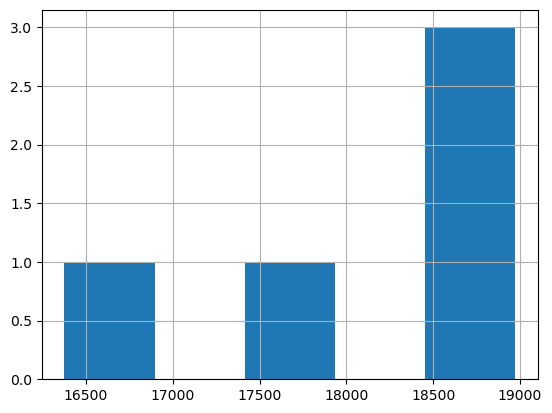

Occurrence_year
2014    3496
2015    3195
2016    3264
2017    3558
2018    4617
Name: Auto Theft, dtype: int64


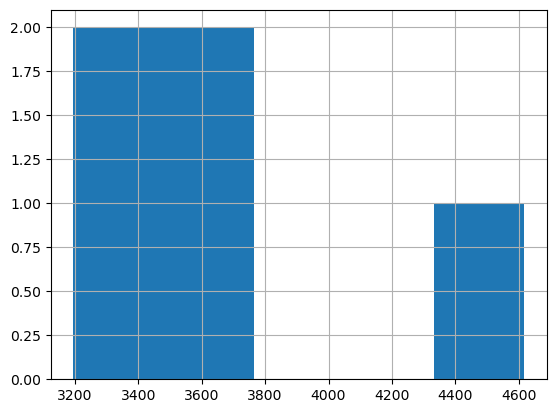

Occurrence_year
2014    7178
2015    6899
2016    6387
2017    6876
2018    7485
Name: Break and Enter, dtype: int64


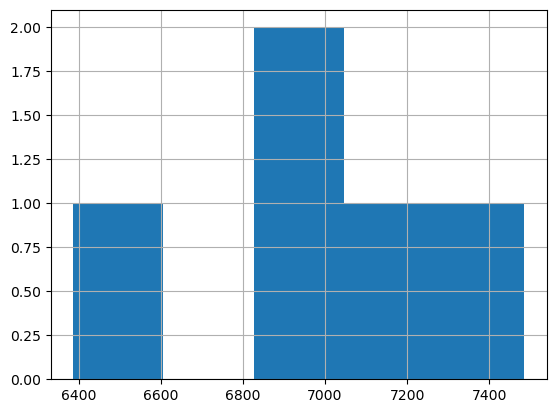

Occurrence_year
2014    15
2015    15
2016    25
2017    15
2018    25
Name: Other, dtype: int64


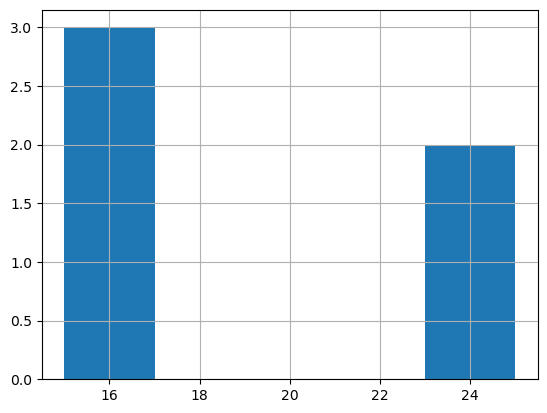

Occurrence_year
2014    3585
2015    3464
2016    3613
2017    3901
2018    3522
Name: Robbery, dtype: int64


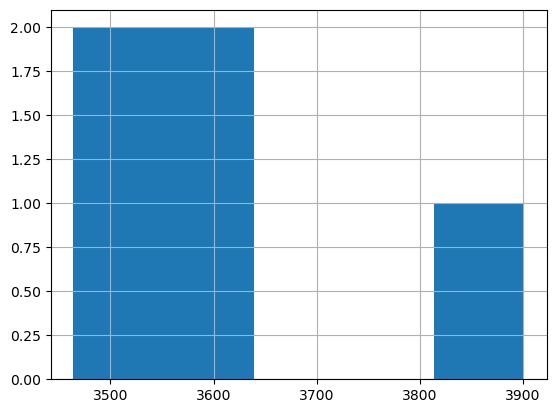

Occurrence_year
2014    27
2015    26
2016    41
2017    39
2018    51
Name: Shooting, dtype: int64


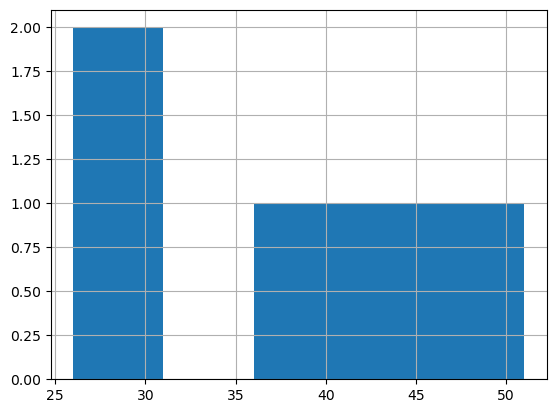

Occurrence_year
2014    16
2015    18
2016     9
2017    11
2018    20
Name: Stabbing, dtype: int64


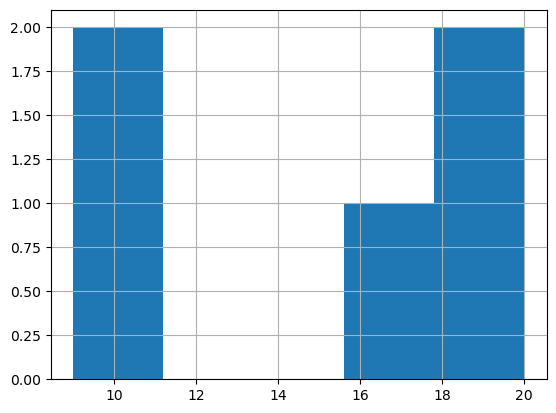

Occurrence_year
2014     994
2015    1019
2016    1012
2017    1149
2018    1141
Name: Theft Over, dtype: int64


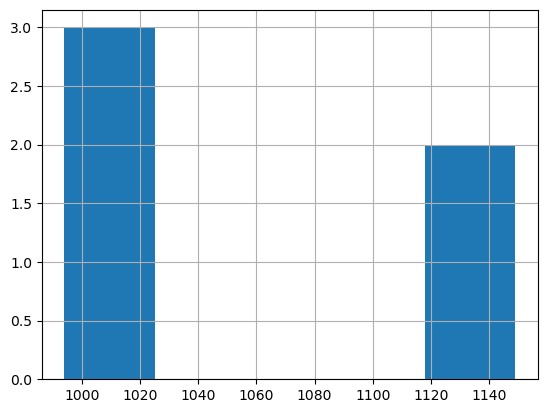

Occurrence_year
2014    31686
2015    32341
2016    32826
2017    34522
2018    35478
Name: All, dtype: int64


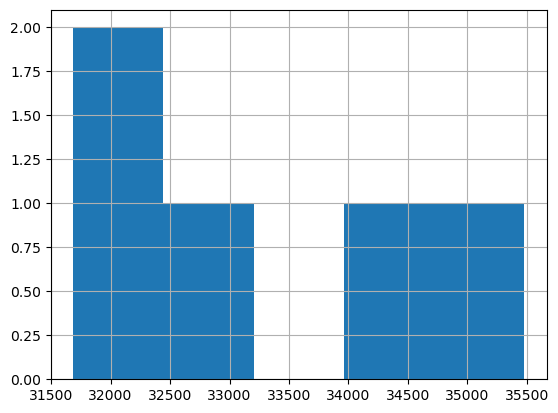

In [243]:
for i in range(0, toronto_mci_ct.shape[0]):
    print (toronto_mci_ct.iloc[i, 0:-1])
    toronto_mci_ct.iloc[i, 0:-1].hist(bins=5)
    plt.show()

In [244]:
# Transpoded crosstab & find correlation
toronto_mci_ct_t =  pd.crosstab(toronto_mci.Type, toronto_mci.Occurrence_year, margins=False).reindex()
toronto_mci_ct_t = toronto_mci_ct_t.T
type_corr = toronto_mci_ct_t.corr()
type_corr

Type,Assault,Auto Theft,Break and Enter,Other,Robbery,Shooting,Stabbing,Theft Over
Type,,,,,,,,
Assault,1.000000,0.299513,-0.218075,0.456443,0.447955,0.740583,-0.318584,0.745530
Auto Theft,0.299513,1.000000,0.782182,0.499696,-0.107950,0.763292,0.558208,0.679521
Break and Enter,-0.218075,0.782182,1.000000,-0.065068,-0.251301,0.199101,0.849350,0.411949
Other,0.456443,0.499696,-0.065068,1.000000,-0.267513,0.803685,-0.058790,0.163311
Robbery,0.447955,-0.107950,-0.251301,-0.267513,1.000000,0.173498,-0.660216,0.513035
Shooting,0.740583,0.763292,0.199101,0.803685,0.173498,1.000000,-0.026706,0.708246
Stabbing,-0.318584,0.558208,0.849350,-0.058790,-0.660216,-0.026706,1.000000,0.107389
Theft Over,0.745530,0.679521,0.411949,0.163311,0.513035,0.708246,0.107389,1.000000


(8.5, -0.5)

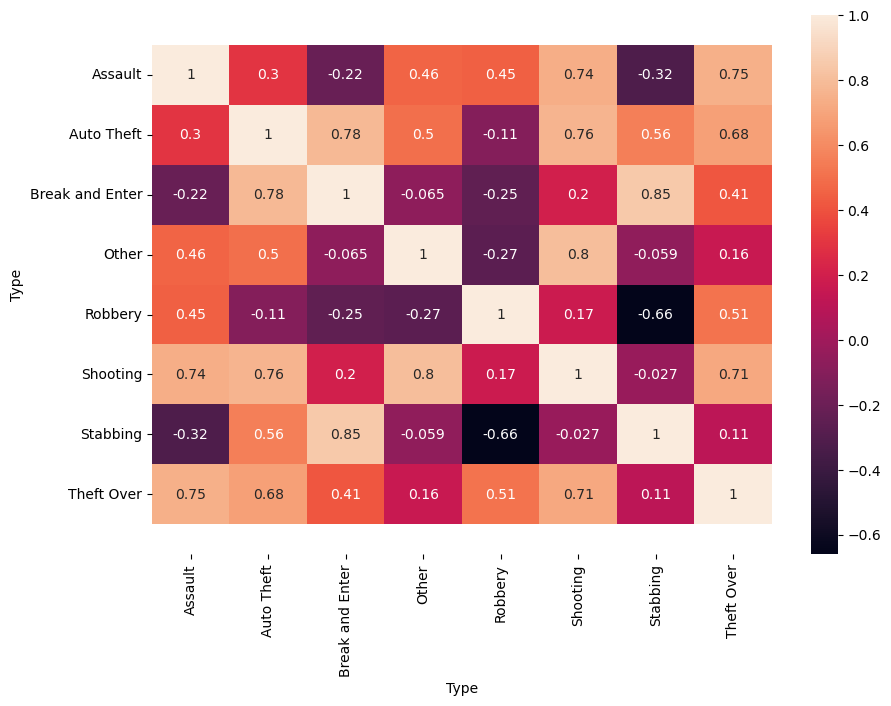

In [245]:
# Correlation heatmap
plt.figure(figsize=(10,7))
ax = sns.heatmap(type_corr, annot=True) #  notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

1 → Perfect positive correlation (both increase together).

0 → No correlation.

-1 → Perfect negative correlation (one increases, the other decreases).


Stabbing has high correlation with Break and Enter (0.85)

Shooting and Other(Homicide) has a strong correlatiion (0.80)

Assault and Theft Over has also high correlation (0.75)

Stabbing and Auto Theft has a high correlation (0.76)

Auto theft and break and enter also has high correlation (0.78)

Shooting and Theft Over has moderate correlation (0.71)

In [246]:
mciPerYear = toronto_mci_ct.loc['All']
mciPerYear

Occurrence_year
2014     31686
2015     32341
2016     32826
2017     34522
2018     35478
All     166853
Name: All, dtype: int64

In [247]:
toronto_mci_annual = pd.concat([pd.Series(mciPerYear.index, name='Year'), 
                       pd.Series(mciPerYear.values, name='Type')], axis=1).reset_index()
toronto_mci_annual = toronto_mci_annual[:-1].drop(columns=['index'])
toronto_mci_annual

,Year,Type
0,2014,31686
1,2015,32341
2,2016,32826
3,2017,34522
4,2018,35478


#### Bar graph to show the crime per capita

Text(0.5, 1.0, 'Annual MCI')

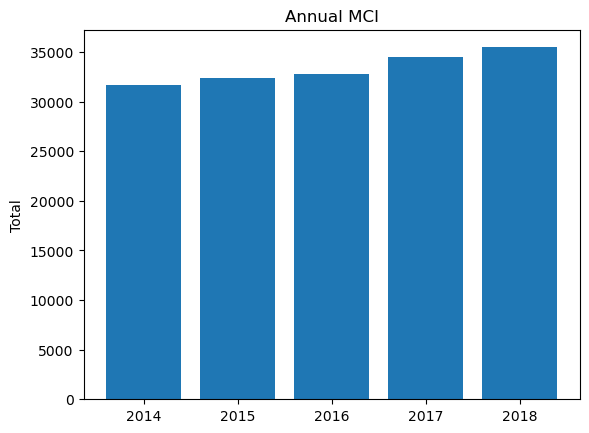

In [248]:
plt.bar('Year', height='Type', width=0.8, align='center', data=toronto_mci_annual)
plt.ylabel('Total')
plt.title('Annual MCI')

#### 4. Statistical Inference 

In [249]:
toronto_mci_hood_ct = pd.crosstab(toronto_mci.Neighbourhood, toronto_mci.Occurrence_year, margins=True)
toronto_mci_hood_ct.sort_values("All", axis = 0, ascending = False,
                 inplace = True) 
toronto_mci_hood_ct.head()

Occurrence_year,2014,2015,2016,2017,2018,All
Neighbourhood,,,,,,
All,31686,32341,32826,34522,35478,166853
Church-Yonge Corridor (75),1020,1112,1147,1460,1555,6294
Waterfront Communities-The Island (77),943,1053,1131,1247,1267,5641
West Humber-Clairville (1),832,773,817,865,1035,4322
Moss Park (73),622,638,729,696,918,3603


In [250]:
from scipy.stats import chi2_contingency

# Count crimes in each neighbourhood
crime_counts = toronto_mci["Neighbourhood"].value_counts()

print(crime_counts)

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency([crime_counts.values])

print('\n')
# Print results
print(f"Chi-Square Statistic: {chi2_stat}, P-value: {p_val}")
if p_val < 0.05:
    print("Crime distribution across Neighborhood is significantly different.")
else:
    print("Crime distribution across Neighborhood is not significantly different.")

Neighbourhood
Church-Yonge Corridor (75)                6294
Waterfront Communities-The Island (77)    5641
West Humber-Clairville (1)                4322
Moss Park (73)                            3603
Bay Street Corridor (76)                  3557
                                          ... 
Broadview North (57)                       300
Markland Wood (12)                         292
Yonge-St.Clair (97)                        234
Lambton Baby Point (114)                   190
Eringate-Centennial_West Deane (11)         23
Name: count, Length: 141, dtype: int64


Chi-Square Statistic: 0.0, P-value: 1.0
Crime distribution across Neighborhood is not significantly different.


#### 5. Visualization and presentation of Findings

#### Crimes across top 5 dangerous neighbourhood from 2014 to 2018

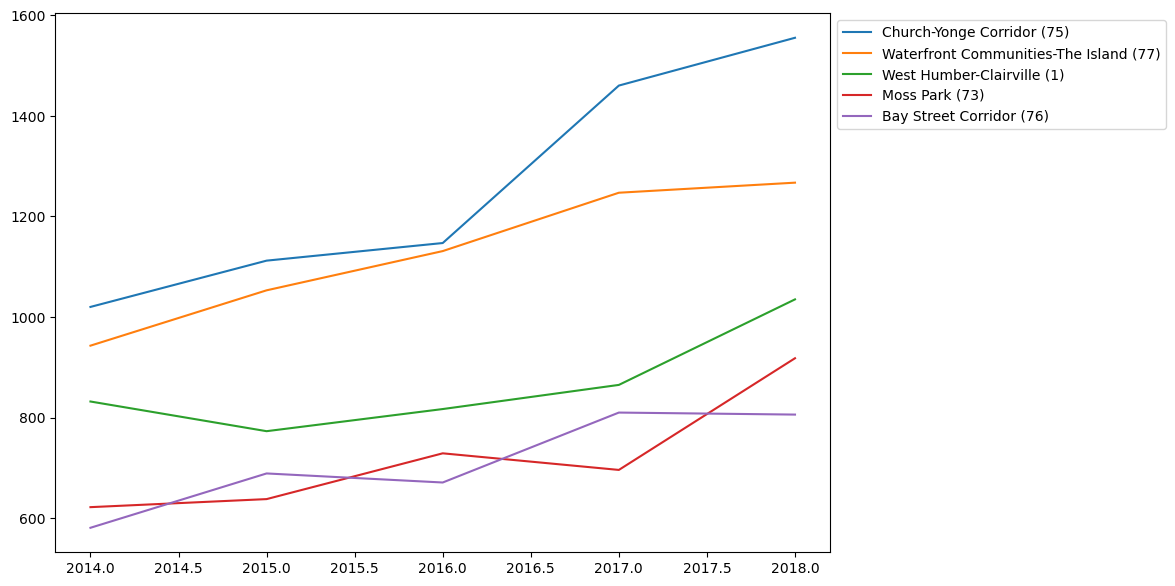

In [251]:
top5dangerous = toronto_mci_hood_ct.iloc[1:6,:5].T
fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.plot(top5dangerous)
ax.legend(top5dangerous.columns.to_list(), bbox_to_anchor = (1,1))

## Toronto Major Crime Indicators (MCI) Analysis Report
### 1. Introduction


This report presents an analysis of Toronto’s Major Crime Indicators (MCI) dataset, sourced from Kaggle. The analysis aims to understand crime trends in Toronto, perform data preprocessing, conduct exploratory data analysis (EDA), and apply statistical tests to derive insights.

### 2. Data Cleaning and Preprocessing

- Duplicates: Checked for duplicate records in the dataset.
- Missing Data:
Missing values were identified in the occurrence year and month, which were derived from the occurrence date.
- Filtering Data:
Crime data was filtered to include records from 2014 to 2018, as this period contains the most relevant data.
### 3. Exploratory Data Analysis (EDA)
- Crime Trends Over Time:
Used crosstabs to analyze the frequency of different crime types from 2014 to 2018.
- Used histogram to analyse the frequency of number of crimes per each crime type.
- Correlation Analysis:
Stabbing and Break and Enter have a high correlation (0.85).
Shooting and Other (Homicide) have a strong correlation (0.80).
Assault and Theft Over show a high correlation (0.75).
Stabbing and Auto Theft also have a high correlation (0.76).
### 4. Statistical Tests and Key Findings
- Crime Type Distribution:
Certain crime types, such as shooting and stabbing, are strongly correlated, indicating that violent crimes often co-occur.
- Dangerous places:
Crime distribution across Neighborhood is not significantly different.

## Reflection on Analaysis Process
### Challenges and solutions
- Missing data and incorrect data types:

During the exploratory data analysis, some numerical and string columns like Occurrence_year and Occurence_Month were missing so we took the month and the year from the date column, while doing that the date column had to be changed to datetime type to gather the relevant information

- Visualizations to communicate the insights was crucial but was a challenge so we iterated and adjusted several parameters like bin size, axis labels, etc. 

- Understanding the values from statistical test to ensure underlying assumptions were met. The p value from chi square test are verified which gave more insights to the data

### Further Questions and Advanced Analyses

- Forecast future crimes :
    - How will crime trends evolve each year?
    - Advanced Technique: Apply time series forecasting models (e.g., ARIMA, Prophet) to predict future crime incidents and identify seasonal trends.

- Specific crimes in specific areas:
    - Can we identify specific patterns in crime occurances across neighbourhood?
    - Advanced Technique: Perform clustering analysis (e.g., k-means, DBSCAN) on the geospatial and temporal data to segment regions with similar crime profiles.